In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
72,76,0,2,140,197,0,1,116,0,1.1,1,0,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
70,34,0,1,118,210,0,0,192,0,0.7,0,0,0,0
255,52,1,3,128,255,0,0,161,1,0.0,0,1,2,1
53,48,1,1,130,245,0,2,180,0,0.2,1,0,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Text(0, 0.5, 'chol')

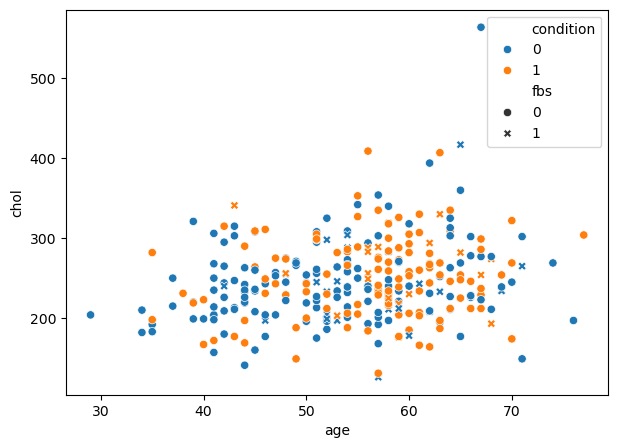

In [56]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['age'], y= df['chol'], hue=df['condition'], style=df['fbs'])
plt.xlabel('age')
plt.ylabel('chol')

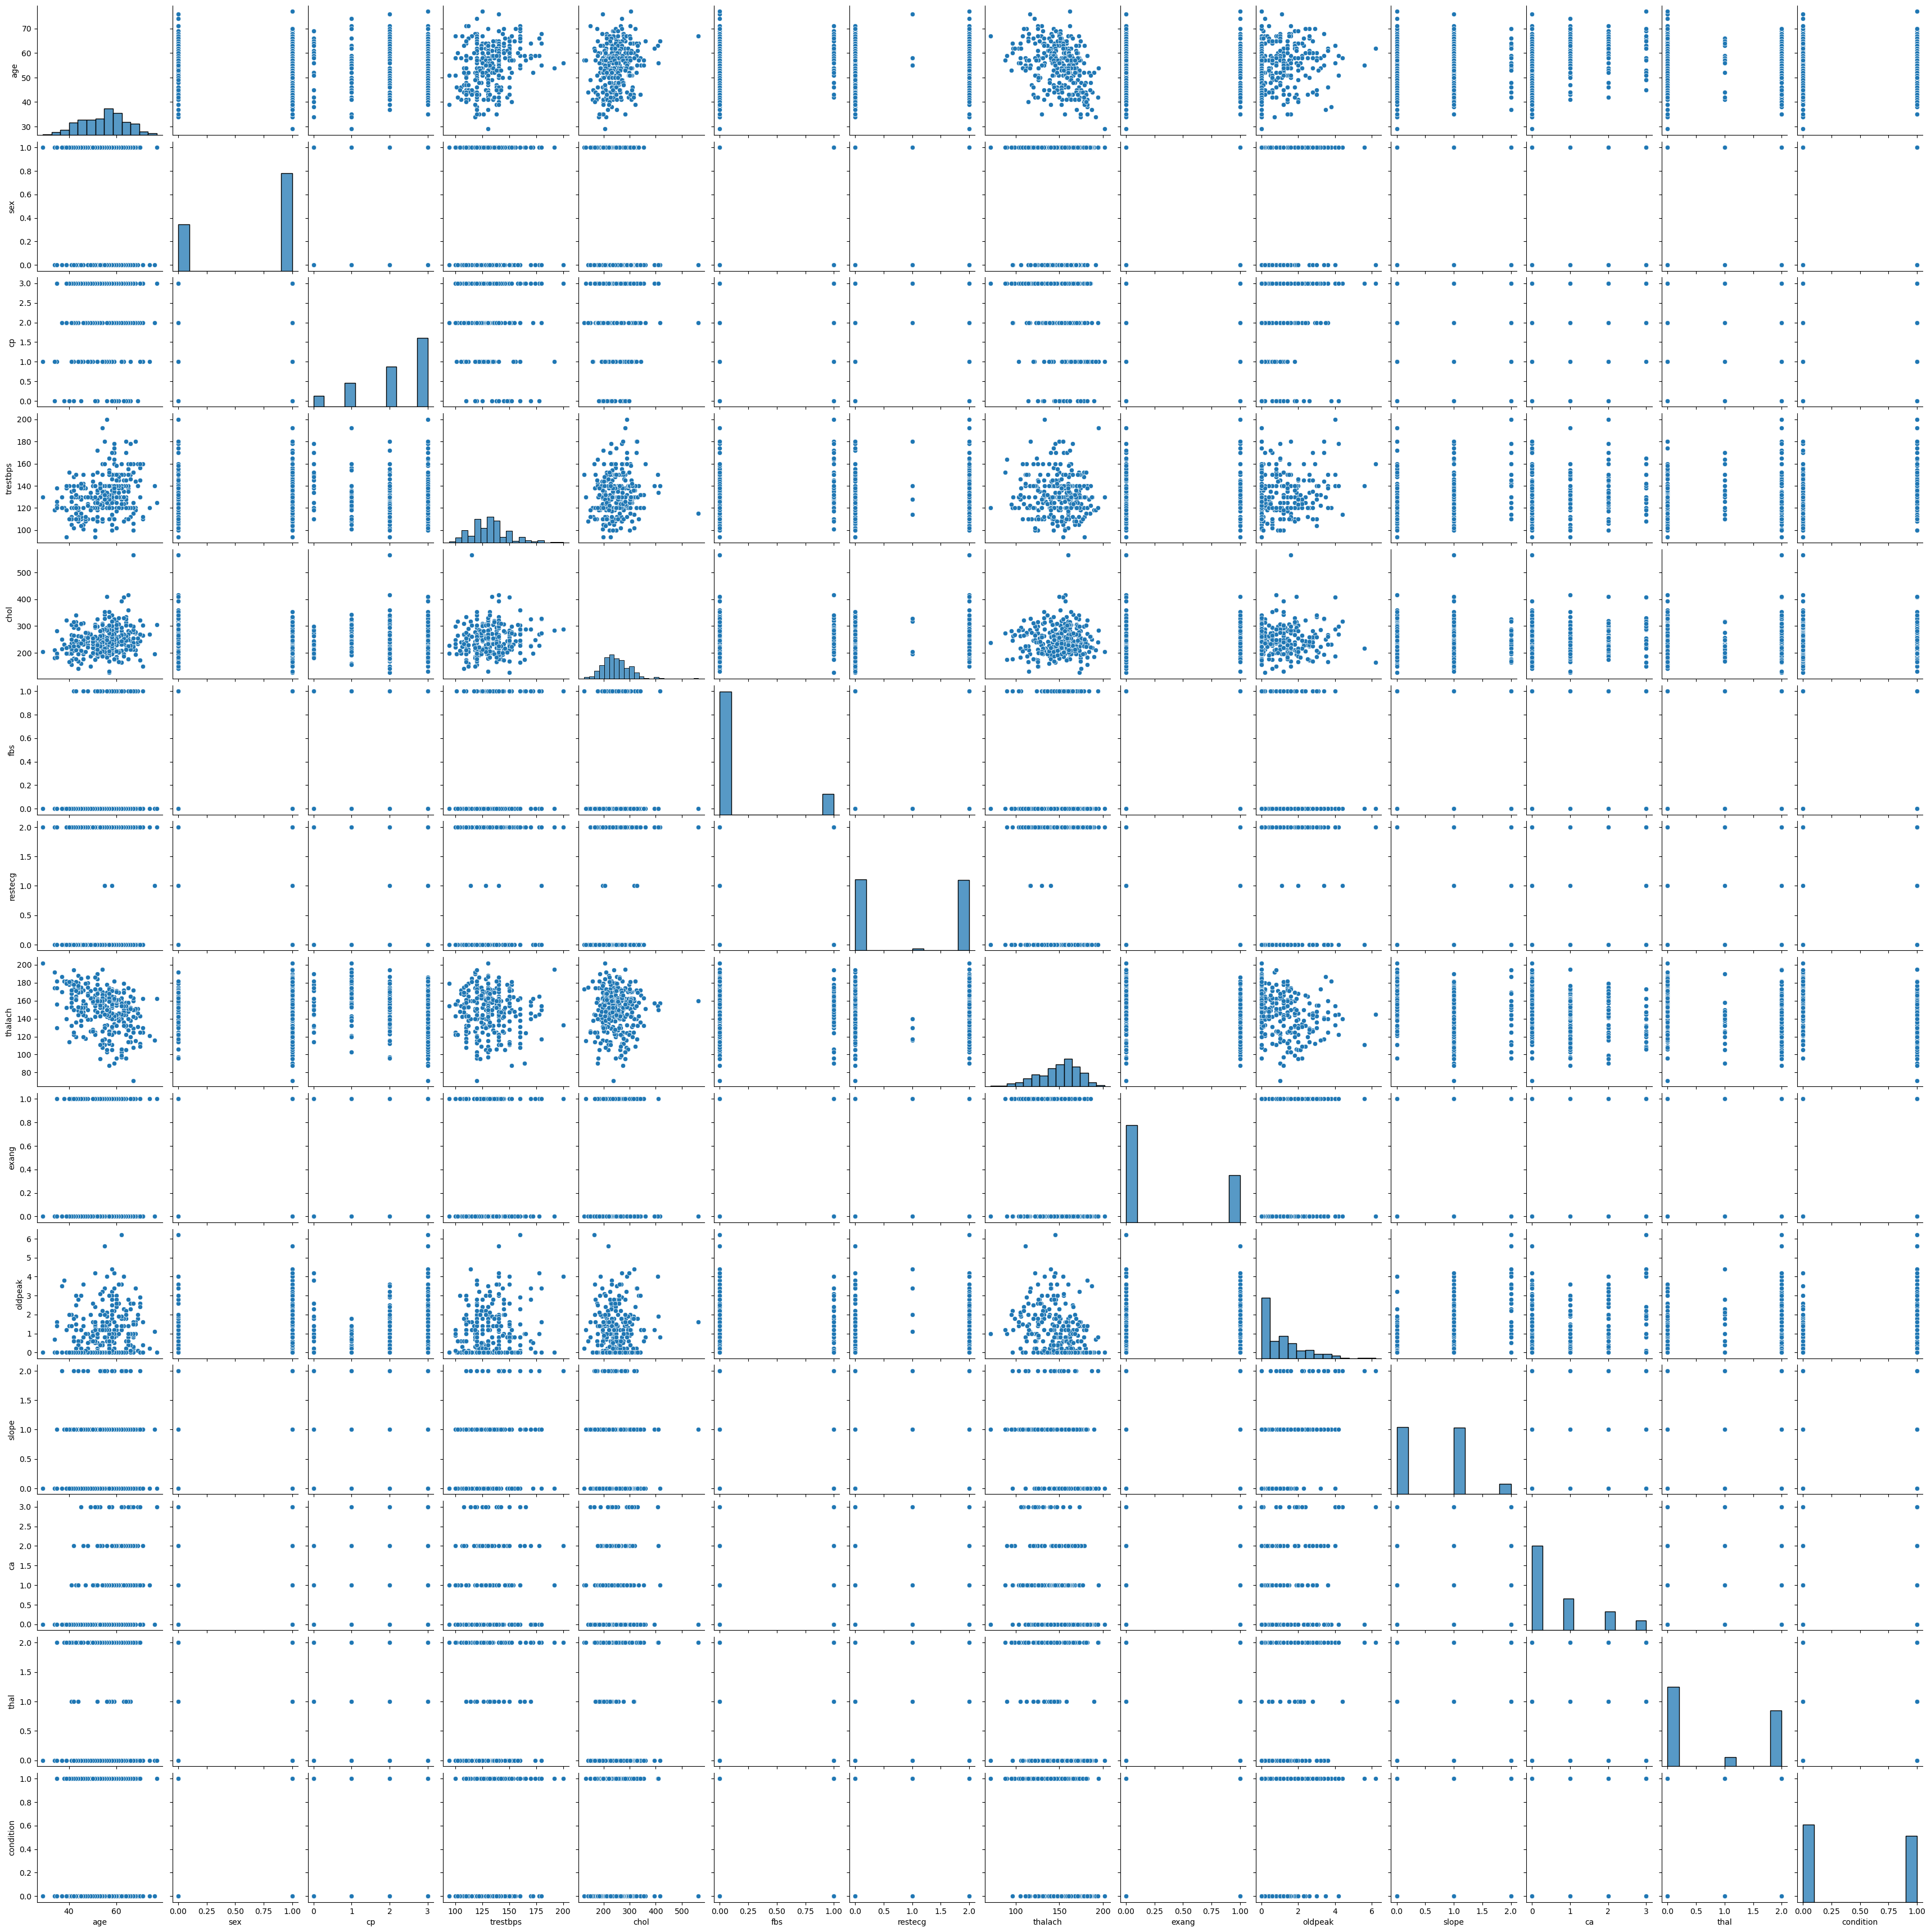

In [58]:
sns.pairplot(df)

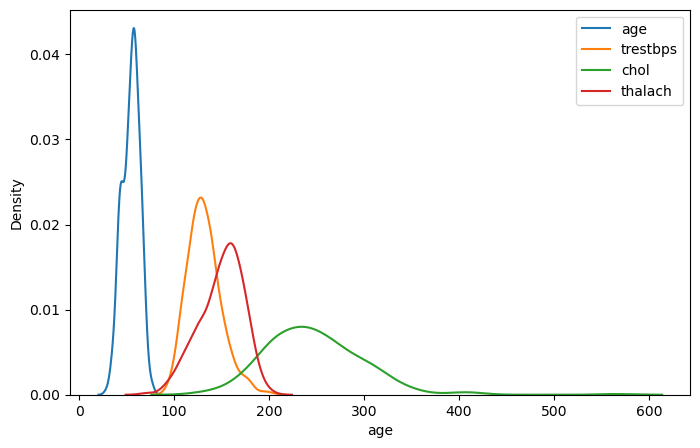

In [59]:
# before scalling 
plt.figure(figsize=(8,5))
sns.kdeplot(df['age'], label='age')
sns.kdeplot(df['trestbps'], label='trestbps')
sns.kdeplot(df['chol'], label='chol')
sns.kdeplot(df['thalach'], label='thalach')
plt.legend()

<Axes: xlabel='condition', ylabel='count'>

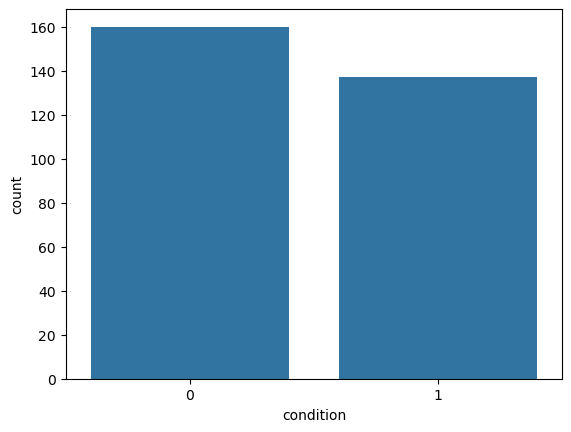

In [60]:
sns.countplot(df, x='condition')

<Axes: xlabel='condition', ylabel='count'>

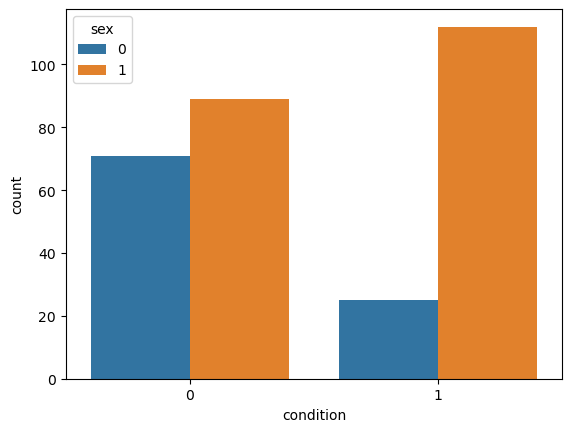

In [61]:
sns.countplot(df, x='condition', hue='sex')

In [62]:
x = df.drop(columns=['condition'])
y = df['condition']

In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_trf= ss.fit_transform(x, y)
x_trf

array([[ 1.60030243,  0.69109474, -2.24062879, ...,  0.6437811 ,
         0.34482438, -0.87429153],
       [ 1.60030243, -1.44697961, -2.24062879, ..., -0.97658319,
         1.41162482, -0.87429153],
       [ 1.26824154, -1.44697961, -2.24062879, ...,  2.26414539,
        -0.72197605, -0.87429153],
       ...,
       [-2.16305433,  0.69109474,  0.87388018, ...,  0.6437811 ,
        -0.72197605,  1.21977769],
       [-2.16305433, -1.44697961,  0.87388018, ..., -0.97658319,
        -0.72197605, -0.87429153],
       [-2.16305433,  0.69109474,  0.87388018, ..., -0.97658319,
        -0.72197605,  1.21977769]])

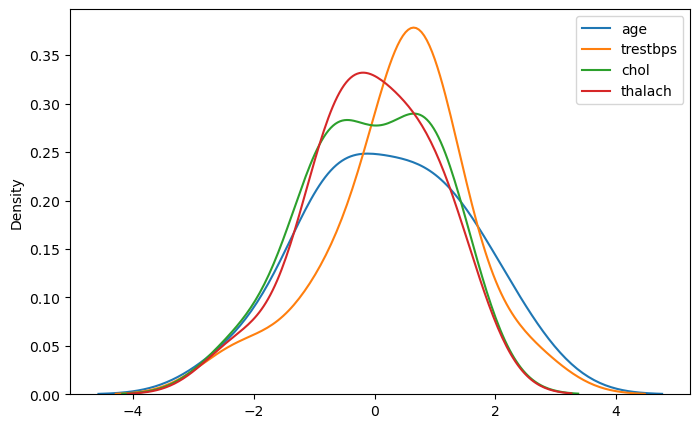

In [70]:
# after scalling
plt.figure(figsize=(8,5))
sns.kdeplot(x_trf[0], label='age')
sns.kdeplot(x_trf[3], label='trestbps')
sns.kdeplot(x_trf[4], label='chol')
sns.kdeplot(x_trf[7], label='thalach')
plt.legend()

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_trf, y, test_size=.2, random_state=10)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [76]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8833333333333333

In [78]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_test)

accuracy_score(y_test, y_pred1)

0.8833333333333333

In [80]:
from sklearn.model_selection import cross_val_score
print('is the cros_val_score of LogisticRegression: ', cross_val_score(lr, x_train, y_train, cv=5))
print('is the cros_val_score of KNN: ', cross_val_score(knn, x_train, y_train, cv=5))

is the cros_val_score of LogisticRegression:  [0.83333333 0.875      0.80851064 0.82978723 0.76595745]
is the cros_val_score of KNN:  [0.85416667 0.89583333 0.82978723 0.76595745 0.78723404]


In [82]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='gini')

dc.fit(x_train, y_train)
y_pred2 = dc.predict(x_test)

accuracy_score(y_test, y_pred2)

0.7333333333333333